In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as scpy
from scipy import stats
from scipy import ndimage
from skimage.transform import resize
import os

# from ripser import Rips
# from ripser import ripser, lower_star_img, Rips
# from persim import plot_diagrams
import dionysus as d

import csv
import pandas as pd
import pickle

from sklearn.cluster import KMeans

from mpl_toolkits.mplot3d import Axes3D
from skimage import io

import importlib
import helper_functions
importlib.reload(helper_functions)
from helper_functions import *

# %matplotlib notebook
import warnings
warnings.filterwarnings('ignore')

from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
rcParams['font.family'] = 'arial'
rcParams.update({'font.size': 12})

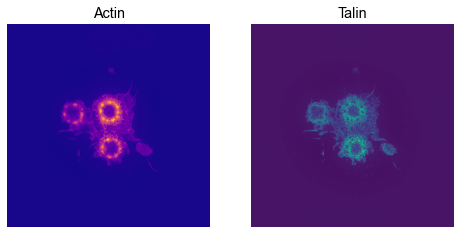

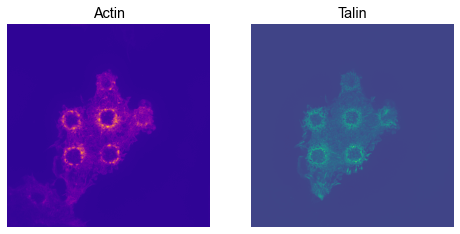

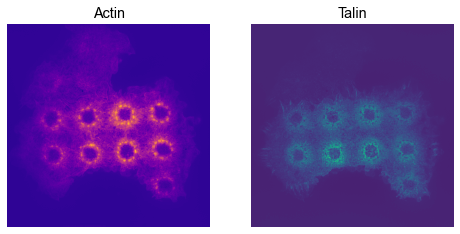

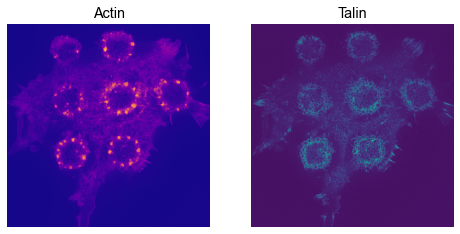

In [2]:
files = ['002','004','008','010']

pix_sizes = [41.47/1024,41.47/1024,41.47/1024,28.35/700] #um
all_clusters = []
all_centers = []
other_species = 'Talin'
for i,file in enumerate(files):
    images = io.imread('../../../SH-CH/talin_actin/' + file + '_Composite.tif')
    file_name = 'AT_Analyzed/AT'+file

    actin = images[1]
    other = images[0]
    
    fig, axes = plt.subplots(ncols=2,figsize=(8,4))
    axes[0].imshow(actin,cmap=plt.cm.plasma)
    axes[0].set_title('Actin')
    axes[0].axis('off')
    axes[1].imshow(other)
    axes[1].set_title('Talin')
    axes[1].axis('off')

In [11]:
files = ['002','004','008','010']

pix_sizes = [41.47/1024,41.47/1024,41.47/1024,28.35/700] #um
all_pods_pr = []
all_sites_pr = []
all_clusters = []
all_centers = []
for i,file in enumerate(files):
    images = io.imread('../../../SH-CH/talin_actin/' + file + '_Composite.tif')
    file_name = 'AT_Analyzed/AT'+file

    actin = images[1]
    other = images[0]

    pix_size = pix_sizes[i]
    len_micron = int(1/pix_size)
    pod_filt = int(0.35*len_micron)
    site_filt = int(1*len_micron)
    pods, sites = find_pod_and_sites_ph(actin,pod_filt,site_filt,plot_bool=False,plot_pers=False,save_file = '')
    all_pods_pr.append(pods)
    all_sites_pr.append(sites)
    clusters,centers,radii = cluster_refine_pods_and_sites(pods,sites,actin,pix_size,plot_bool=False,save_file = '',upper_lim=3,lower_lim=1)
    all_clusters.append(clusters)
    all_centers.append(centers)


#### Save and/or load

In [186]:
pickle.dump( all_clusters, open( "all_clusters_AT.p", "wb" ) )
pickle.dump( all_centers, open( "all_centers_AT.p", "wb" ) )

In [4]:
all_clusters = pickle.load( open( "all_clusters_AT.p", "rb" ) )
all_centers = pickle.load( open( "all_centers_AT.p", "rb" ) )

In [25]:
# clusters,centers,radii = cluster_refine_pods_and_sites(pods,sites,actin,pix_size,save_file = file_name,upper_lim=3,lower_lim=1)

clusters = all_clusters[0]
centers = all_centers[0]

In [26]:
podosome_centers = np.array([list(point) for cluster in clusters for point in cluster])
cxs = podosome_centers.T[0]
cys = podosome_centers.T[1]

In [9]:
manual_folder = '../../../SH-CH/talin_actin/Shiqiong_ManualIdentification'

manual_files = os.listdir(manual_folder)
manual_files = [file for file in manual_files if '.csv' in file]
# print(manual_files)
# manual_df = pd.read_csv('../../../SH-CH/talin_actin/Results002_AT.csv')

In [7]:
### Just for convenience when plotting figure

# from matplotlib.patches import Patch
# from matplotlib.lines import Line2D


# plt.figure(figsize=(3,3))

# legend_elements = [Line2D([0], [0], marker='o', color='none', label='True Positive',
#                   markerfacecolor='lime',markeredgecolor='none', markersize=10),
#            Line2D([0], [0], marker='d', color='none', label='False Positive',
#                   markerfacecolor='m', markeredgecolor='none',markersize=10),
#                    Line2D([0], [0], marker='x', color='none', label='False Negative',
#                   markerfacecolor='r',markeredgecolor='r', markersize=10)]

# ax = plt.gca()
# ax.legend(handles=legend_elements, loc='upper left')


# # plt.savefig('../../../SH-CH/WorkingFiguresCurrent/Figure3_Methods/IndividualPlots/FDR_Legend.pdf',transparent=True,dpi=300,bbox_inches='tight')


#### Initial Results (no refinement)

166 21 29
Positive predictive value: 0.89
False discovery rate: 0.11


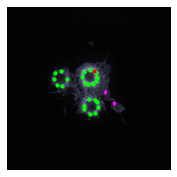

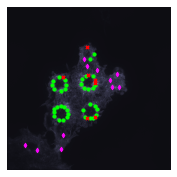

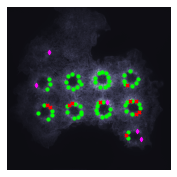

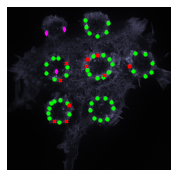

In [12]:
files = ['002','004','008','010']

pix_sizes = [41.47/1024,41.47/1024,41.47/1024,28.35/700] #um

tot_true_pos = 0
tot_false_pos = 0
tot_false_neg = 0


for i,file in enumerate(files):
    images = io.imread('../../../SH-CH/talin_actin/' + file + '_Composite.tif')
    file_name = 'AT_Analyzed/AT'+file

    actin = images[1]

    pix_size = pix_sizes[i]
    
    manual_file = [f for f in manual_files if file in f][0]
    manual_df = pd.read_csv(manual_folder + '/' + manual_file)
    
    podosome_centers = all_pods_pr[i]
    cxs = podosome_centers.T[0]
    cys = podosome_centers.T[1]

    plt.figure(figsize = (3,3))
#     plt.title('Initial Results')
    plt.imshow(actin,cmap=plt.cm.bone)
    plt.axis('off')

#     if file == '004':
#         legend_elements = [Line2D([0], [0], marker='o', color='none', label='True Positive',
#                           markerfacecolor='lime',markeredgecolor='none', markersize=15),
#                    Line2D([0], [0], marker='d', color='none', label='False Positive',
#                           markerfacecolor='m', markeredgecolor='none',markersize=15),
#                            Line2D([0], [0], marker='x', color='none', label='False Positive',
#                           markerfacecolor='r',markeredgecolor='r', markersize=15)]

#         ax = plt.gca()
#         ax.legend(handles=legend_elements, loc='upper left',bbox_to_anchor=(1.03, 1))
    
    manual_loc = np.array([manual_df['X']/pix_size,manual_df['Y']/pix_size]).T
    
    def closest_node(node, nodes):
        from scipy.spatial import distance
        cdists = distance.cdist([node], nodes)
        closest_index = cdists.argmin()
        closest_distance = cdists.min()
        return (closest_index,closest_distance)
    
    true_pos = []
    for pod in manual_loc:
        idx, dist = closest_node(pod,podosome_centers)
        
        if dist < 0.4/pix_size:
#             plt.scatter(*podosome_centers[idx],color='y')
            true_pos.append(podosome_centers[idx])

    true_pos = np.array(true_pos)
    plt.scatter(true_pos.T[0],true_pos.T[1],color='lime',marker='o',s=10)
    
    false_neg = [point for point in manual_loc if closest_node(point,true_pos)[1] > 0.4/pix_size]
    false_neg = np.array(false_neg)
    
    if len(false_neg) > 0:
        plt.scatter(false_neg.T[0],false_neg.T[1],color='r',marker='x',s=10)
    
    false_pos = [point for point in podosome_centers if closest_node(point,manual_loc)[1] > 0.4/pix_size]
    false_pos = np.array(false_pos)
    
    if len(false_pos) > 0:
        plt.scatter(false_pos.T[0],false_pos.T[1],color='magenta',marker='d',s=10)
        
        
    tot_true_pos += len(true_pos)
    tot_false_pos += len(false_pos)
    tot_false_neg += len(false_neg)
    
#     plt.savefig('../../../SH-CH/WorkingFiguresCurrent/Figure3_Methods/IndividualPlots/Initial_FDR_%s.pdf'%file,transparent=True,dpi=300,bbox_inches='tight')


# plt.close('all')

print(tot_true_pos,tot_false_pos,tot_false_neg)
print('Positive predictive value: %.2f'%(tot_true_pos/(tot_true_pos+tot_false_pos)))
print('False discovery rate: %.2f'%(tot_false_pos/(tot_true_pos+tot_false_pos)))


#### Results after post-processing refinement

<IPython.core.display.Javascript object>


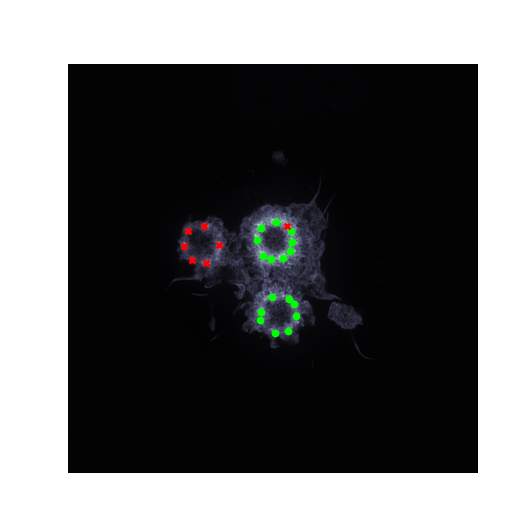

<IPython.core.display.Javascript object>


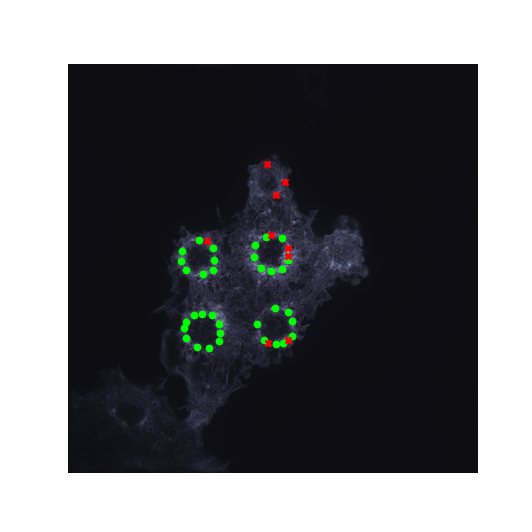

<IPython.core.display.Javascript object>


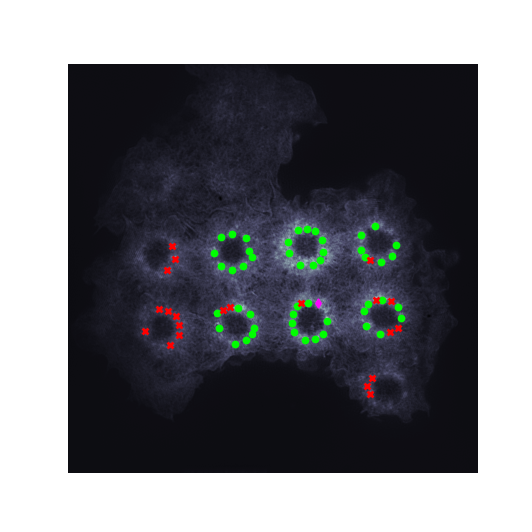

<IPython.core.display.Javascript object>


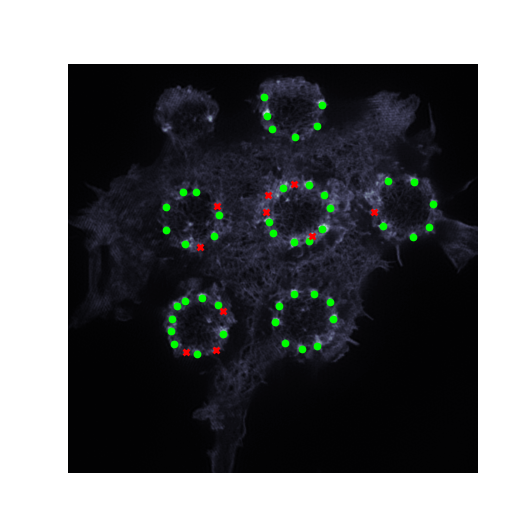

148 1 47
Positive predictive value: 0.99
False discovery rate: 0.01


In [66]:
files = ['002','004','008','010']

pix_sizes = [41.47/1024,41.47/1024,41.47/1024,28.35/700] #um

tot_true_pos = 0
tot_false_pos = 0
tot_false_neg = 0

for i,file in enumerate(files):
    images = io.imread('../../../SH-CH/talin_actin/' + file + '_Composite.tif')
    file_name = 'AT_Analyzed/AT'+file

    actin = images[1]

    pix_size = pix_sizes[i]
    
    manual_file = [f for f in manual_files if file in f][0]
    manual_df = pd.read_csv(manual_folder + '/' + manual_file)
    
    clusters = all_clusters[i]
    centers = all_centers[i]
    
    podosome_centers = np.array([list(point) for cluster in clusters for point in cluster])
    cxs = podosome_centers.T[0]
    cys = podosome_centers.T[1]
#     podosome_centers = np.vstack([podosome_centers, [350,300]]) #false positive test

    plt.figure(figsize=(3,3))
#     plt.title('Post-Refinement Results')
    plt.imshow(actin,cmap=plt.cm.bone)
    plt.axis('off')
#     plt.scatter(cxs,cys,color='blue',marker='x')
#     plt.scatter(manual_df['X']/pix_size,manual_df['Y']/pix_size,color='red',marker='o')
    
    manual_loc = np.array([manual_df['X']/pix_size,manual_df['Y']/pix_size]).T
    
    def closest_node(node, nodes):
        from scipy.spatial import distance
        cdists = distance.cdist([node], nodes)
        closest_index = cdists.argmin()
        closest_distance = cdists.min()
        return (closest_index,closest_distance)
    
    true_pos = []
    for pod in manual_loc:
        idx, dist = closest_node(pod,podosome_centers)
        
        if dist < 0.4/pix_size:
#             plt.scatter(*podosome_centers[idx],color='y')
            true_pos.append(podosome_centers[idx])

    true_pos = np.array(true_pos)
    plt.scatter(true_pos.T[0],true_pos.T[1],color='lime',marker='o',s=10)
    
    false_neg = [point for point in manual_loc if closest_node(point,true_pos)[1] > 0.4/pix_size]
    false_neg = np.array(false_neg)
    
    if len(false_neg) > 0:
        plt.scatter(false_neg.T[0],false_neg.T[1],color='r',marker='x',s=10)
    
    false_pos = [point for point in podosome_centers if closest_node(point,manual_loc)[1] > 0.4/pix_size]
    false_pos = np.array(false_pos)
    
    if len(false_pos) > 0:
        plt.scatter(false_pos.T[0],false_pos.T[1],color='magenta',marker='d',s=10)
        
        
    tot_true_pos += len(true_pos)
    tot_false_pos += len(false_pos)
    tot_false_neg += len(false_neg)
    
    plt.savefig('../../../SH-CH/WorkingFiguresCurrent/Figure3_Methods/IndividualPlots/PostRefine_FDR_%s.pdf'%file,transparent=True,dpi=300,bbox_inches='tight')



# plt.close('all')

print(tot_true_pos,tot_false_pos,tot_false_neg)
print('Positive predictive value: %.2f'%(tot_true_pos/(tot_true_pos+tot_false_pos)))
print('False discovery rate: %.2f'%(tot_false_pos/(tot_true_pos+tot_false_pos)))
